In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt

from scipy import stats
import math
import numpy as np

%matplotlib inline

In [27]:
fname = 'pluto.geojson'
df = gpd.read_file(fname)

In [28]:
df.head()

,assessland,assesstot,bbl,exemptland,exempttot,lotarea,geometry
0,2581650,4978350,1014140001,0,0,1607,"(POLYGON ((-73.96613000000001 40.761447, -73.9..."
1,1111500,8326800,1001750033,0,0,7532,"(POLYGON ((-74.003488 40.717669, -74.003596 40..."
2,0,0,1001760015,0,0,0,"(POLYGON ((-74.00702 40.71777, -74.006987 40.7..."
3,208350,636750,1002020030,0,0,2000,"(POLYGON ((-73.99670999999999 40.715512, -73.9..."
4,450,450,1002250118,450,450,105,"(POLYGON ((-74.008099 40.723635, -74.008162 40..."


### Definitions of Tax Terms: https://www1.nyc.gov/site/finance/taxes/property-assessments.page

In [30]:
print(len(df))
df = df[df['lotarea'] != 0]
print(len(df))
df['assestotperarea'] = df['assesstot'] / df['lotarea']

145900
144995


In [31]:
df.head()

,assessland,assesstot,bbl,exemptland,exempttot,lotarea,geometry,assestotperarea
0,2581650,4978350,1014140001,0,0,1607,"(POLYGON ((-73.96613000000001 40.761447, -73.9...",3097.915370
1,1111500,8326800,1001750033,0,0,7532,"(POLYGON ((-74.003488 40.717669, -74.003596 40...",1105.523101
3,208350,636750,1002020030,0,0,2000,"(POLYGON ((-73.99670999999999 40.715512, -73.9...",318.375000
4,450,450,1002250118,450,450,105,"(POLYGON ((-74.008099 40.723635, -74.008162 40...",4.285714
5,735750,872100,1000020003,735750,872100,38800,"(POLYGON ((-74.01105800000001 40.70091, -74.01...",22.476804


In [59]:
df = df[(np.abs(stats.zscore(df['assestotperarea'])) < 3)]

142587

In [61]:
df.to_file(filename='cleaned_pluto',driver='GeoJSON')

In [34]:
taxperarea = df['assestotperarea']
taxperarea.describe()

count    1.449950e+05
mean     1.945525e+02
std      8.192654e+03
min      0.000000e+00
25%      1.421147e+01
50%      2.421900e+01
75%      1.238800e+02
max      2.545653e+06
Name: assestotperarea, dtype: float64

(array([ 101123.,   12092.,    7374.,    4953.,    3744.,    2906.,
           2230.,    1731.,    1286.,     992.]),
 array([   0.        ,   79.30041152,  158.60082305,  237.90123457,
         317.20164609,  396.50205761,  475.80246914,  555.10288066,
         634.40329218,  713.7037037 ,  793.00411523]),
 <a list of 10 Patch objects>)

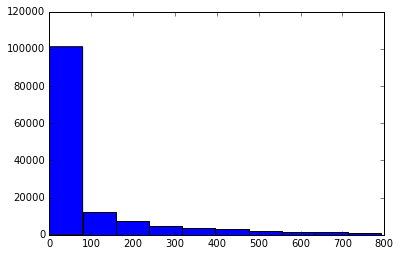

In [56]:
taxperarea = taxperarea[(np.abs(stats.zscore(taxperarea)) < 3)]
plot.hist(taxperarea)